
# Makine öğrenmesi ile şeker hastalığını tahmin etme







In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


# Outcome = 1 Diabet/Şeker Hastası
# Outcome = 0 Sağlıklı
data = pd.read_csv("diabetes.csv")
data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


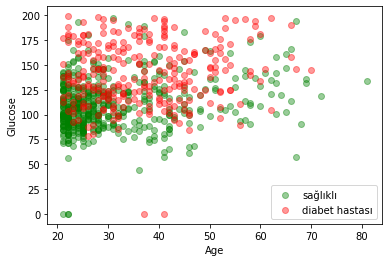

In [19]:


seker_hastalari = data[data.Outcome == 1]
saglikli_insanlar = data[data.Outcome == 0]


# Şimdilik sadece gloucose'a bakarak örnek bir çizim yapalım:
# Programımızın sonunda makine öğrenme modelimiz sadece glikoza değil tüm diğer verilere bakarak bir tahmin yapacaktır..
plt.scatter(saglikli_insanlar.Age, saglikli_insanlar.Glucose, color="green", label="sağlıklı", alpha = 0.4)
plt.scatter(seker_hastalari.Age, seker_hastalari.Glucose, color="red", label="diabet hastası", alpha = 0.4)
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.legend()
plt.show()


In [20]:


# x ve y eksenlerini belirleyelim
y = data.Outcome.values
x_ham_veri = data.drop(["Outcome"],axis=1)   
# Outcome sütununu(dependent variable) çıkarıp sadece independent variables bırakıyoruz
# Çüknü  algoritmalarının x değerleri içerisinde gruplandırmasını yapacak..


# normalization yapıyoruz - x_ham_veri içerisindeki değerleri sadece 0 ve 1 arasında olacak şekilde hepsini güncelliyoruz
# Eğer bu şekilde normalization yapmazsak yüksek rakamlar küçük rakamları ezer ve  algoritmaları yanıltabilir!
x = (x_ham_veri - np.min(x_ham_veri))/(np.max(x_ham_veri)-np.min(x_ham_veri))

# önce
print("Normalization öncesi ham veriler:\n")
print(x_ham_veri.head())


# sonra 
print("\n\n\nNormalization sonrası yapay zekaya eğitim için vereceğimiz veriler:\n")
print(x.head())
    



Normalization öncesi ham veriler:

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  



Normalization sonrası yapay zekaya eğitim için vereceğimiz veriler:

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  

<AxesSubplot:>

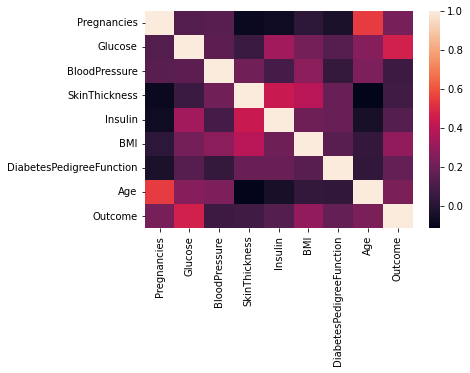

In [27]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='count', ylabel='Outcome'>

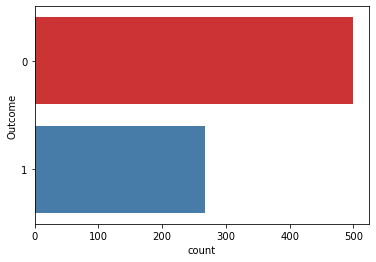

In [28]:
sns.countplot(y=data['Outcome'],palette='Set1')

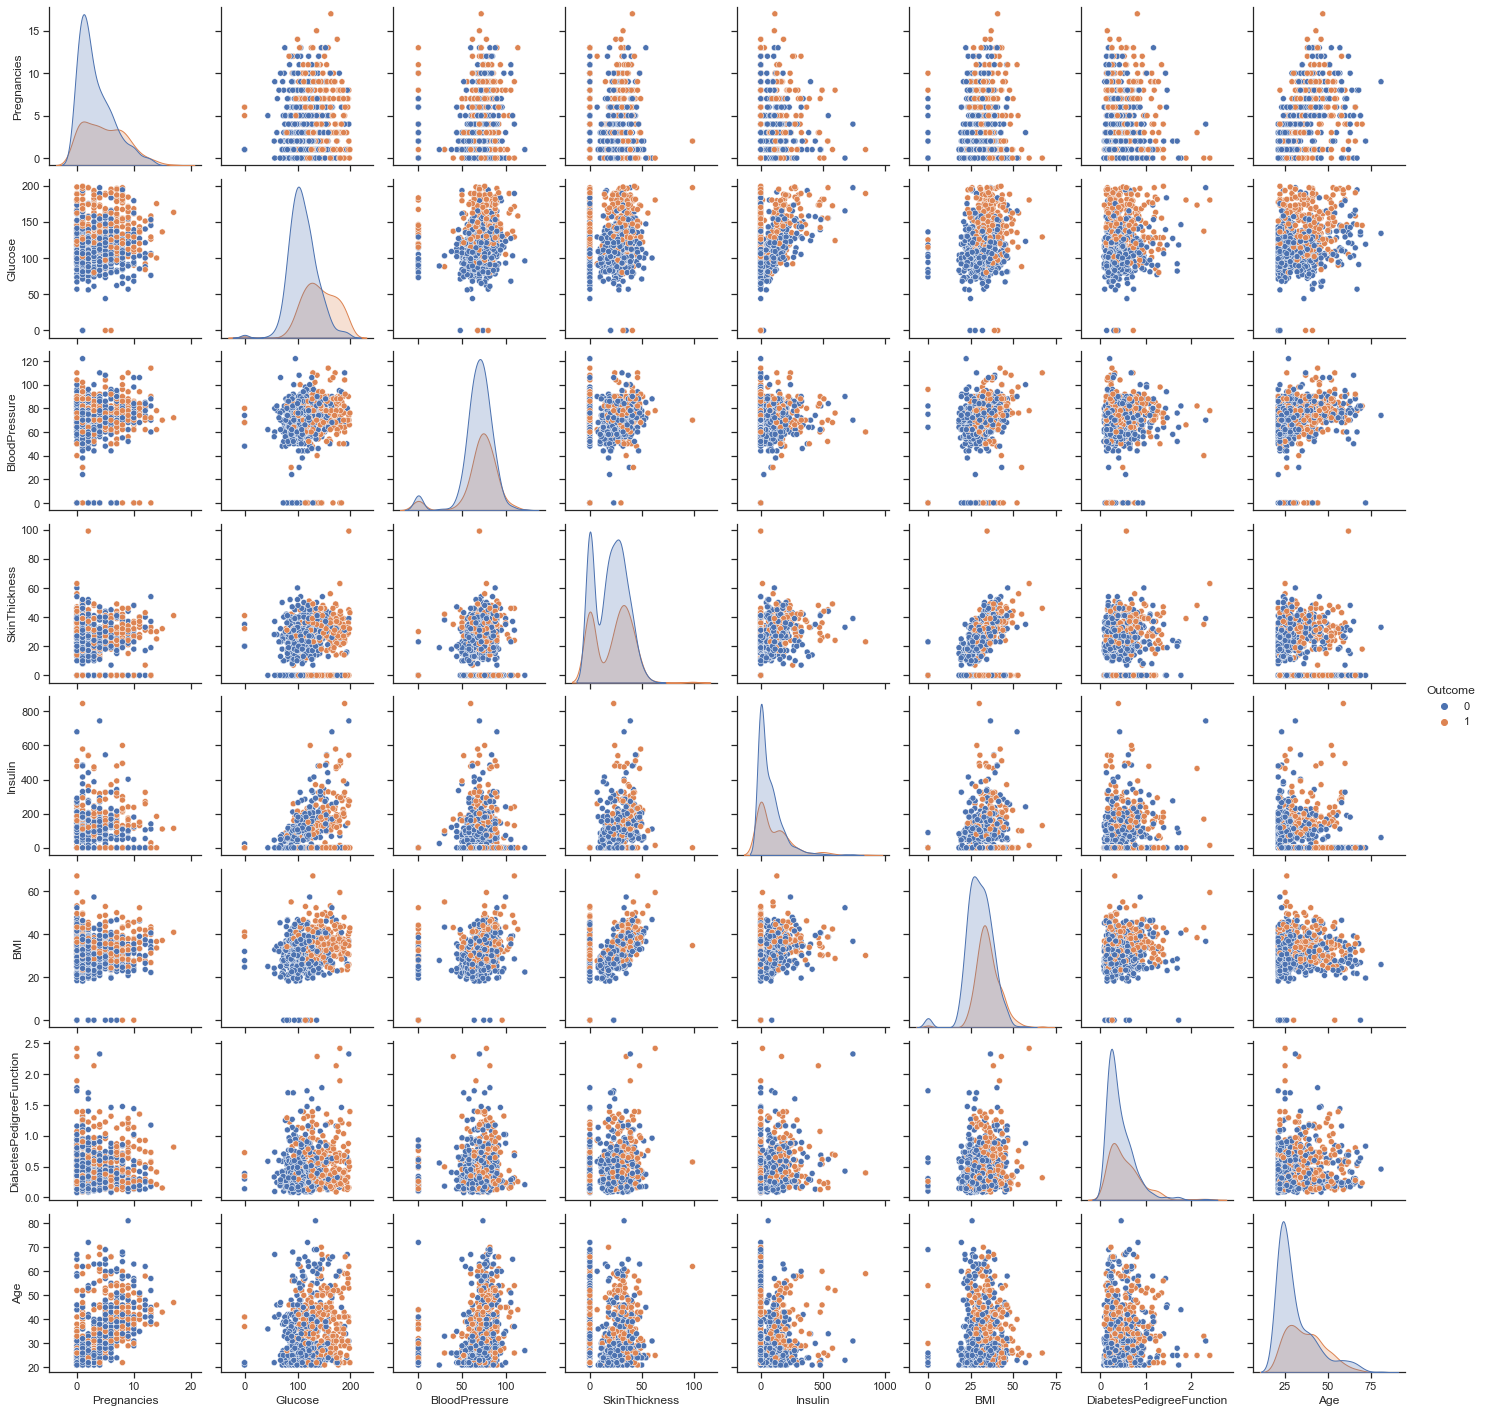

In [29]:
sns.set(style="ticks")
sns.pairplot(data, hue="Outcome")

[[44  4]
 [ 9 20]]


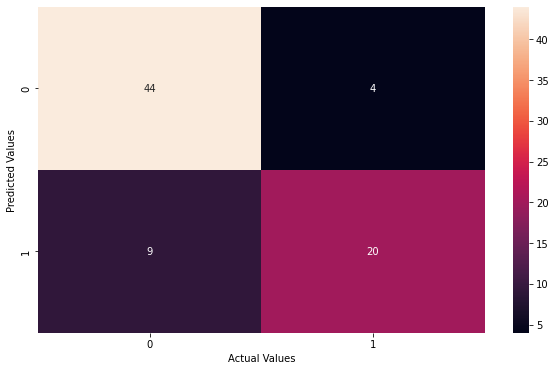


Accuracy 0.8311688311688312 

Precision 0.8333333333333334 

Recall 0.6896551724137931 

F1 0.7547169811320755 


In [21]:

# train datamız ile test datamızı ayırıyoruz
# train datamız sistemin sağlıklı insan ile hasta insanı ayırt etmesini öğrenmek için kullanılacak
# test datamız ise bakalım makine öğrenme modelimiz doğru bir şekilde hasta ve sağlıklı insanları ayırt edebiliyor mu diye 
# test etmek için kullanılacak...
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.1,random_state=1)


#KNN

from sklearn.neighbors import KNeighborsClassifier

clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
#karmaşıklık matrisi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#find accuracy
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
print("\nAccuracy {0} ".format(ac))

#precision
from sklearn.metrics import precision_score
prc = precision_score(y_test,y_pred)
print("\nPrecision {0} ".format(prc))

#recall
from sklearn.metrics import recall_score
rcl = recall_score(y_test,y_pred)
print("\nRecall {0} ".format(rcl))

#f1_s
from sklearn.metrics import f1_score
f=f1_score(y_test,y_pred)
print("\nF1 {0} ".format(f))








[[43  5]
 [13 16]]


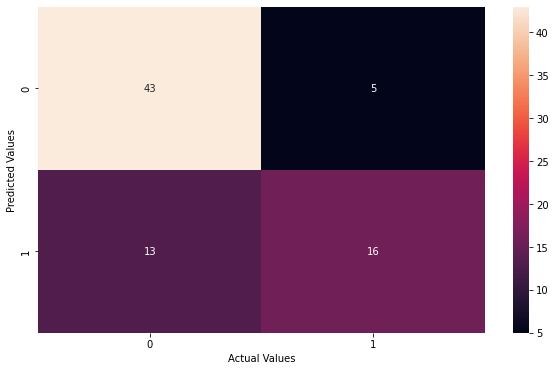


Accuracy 0.7662337662337663 

Precision 0.7619047619047619 

Recall 0.5517241379310345 

F1 0.64 


In [22]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
#karmaşıklık matrisi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#find accuracy
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
print("\nAccuracy {0} ".format(ac))

#precision
from sklearn.metrics import precision_score
prc = precision_score(y_test,y_pred)
print("\nPrecision {0} ".format(prc))

#recall
from sklearn.metrics import recall_score
rcl = recall_score(y_test,y_pred)
print("\nRecall {0} ".format(rcl))

#f1_s
from sklearn.metrics import f1_score
f=f1_score(y_test,y_pred)
print("\nF1 {0} ".format(f))    

[[43  5]
 [11 18]]


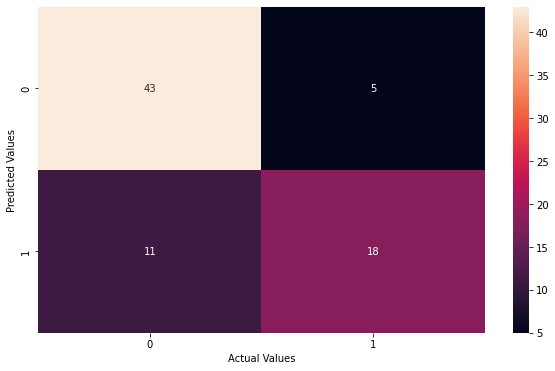


Accuracy 0.7922077922077922 

Precision 0.782608695652174 

Recall 0.6206896551724138 

F1 0.6923076923076923 


In [23]:
#Support Vector Machine
from sklearn.svm import SVC

clf=SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
#karmaşıklık matrisi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#find accuracy
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
print("\nAccuracy {0} ".format(ac))

#precision
from sklearn.metrics import precision_score
prc = precision_score(y_test,y_pred)
print("\nPrecision {0} ".format(prc))

#recall
from sklearn.metrics import recall_score
rcl = recall_score(y_test,y_pred)
print("\nRecall {0} ".format(rcl))

#f1_s
from sklearn.metrics import f1_score
f=f1_score(y_test,y_pred)
print("\nF1 {0} ".format(f))    

[[43  5]
 [ 7 22]]


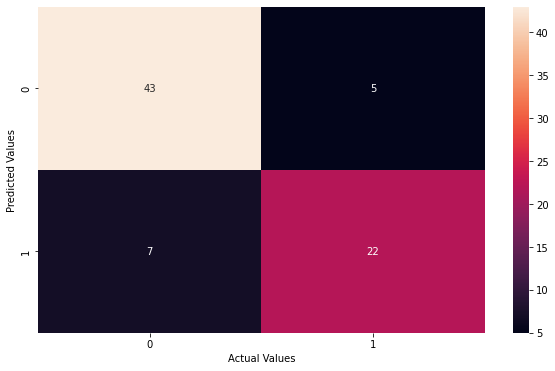


Accuracy 0.8441558441558441 

Precision 0.8148148148148148 

Recall 0.7586206896551724 

F1 0.7857142857142857 


In [24]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()
clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)
#karmaşıklık matrisi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#find accuracy
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
print("\nAccuracy {0} ".format(ac))

#precision
from sklearn.metrics import precision_score
prc = precision_score(y_test,y_pred)
print("\nPrecision {0} ".format(prc))

#recall
from sklearn.metrics import recall_score
rcl = recall_score(y_test,y_pred)
print("\nRecall {0} ".format(rcl))

#f1_s
from sklearn.metrics import f1_score
f=f1_score(y_test,y_pred)
print("\nF1 {0} ".format(f))    

[[42  6]
 [10 19]]


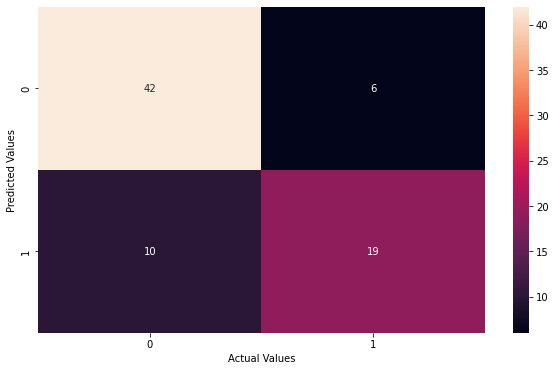


Accuracy 0.7922077922077922 

Precision 0.76 

Recall 0.6551724137931034 

F1 0.7037037037037037 


In [25]:
#Naive Bayes Theorem
#import library
from sklearn.naive_bayes import GaussianNB

clf=GaussianNB()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
#karmaşıklık matrisi
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

#find accuracy
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
print("\nAccuracy {0} ".format(ac))

#precision
from sklearn.metrics import precision_score
prc = precision_score(y_test,y_pred)
print("\nPrecision {0} ".format(prc))

#recall
from sklearn.metrics import recall_score
rcl = recall_score(y_test,y_pred)
print("\nRecall {0} ".format(rcl))

#f1_s
from sklearn.metrics import f1_score
f=f1_score(y_test,y_pred)
print("\nF1 {0} ".format(f))    